In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download CooperUnion/anime-recommendations-database

 20% 5.00M/25.0M [00:00<00:00, 37.4MB/s]
100% 25.0M/25.0M [00:00<00:00, 128MB/s] 


In [12]:
! unzip anime-recommendations-database

Archive:  anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# reading the datasets
anime_data = pd.read_csv('/content/anime.csv')
rating_data = pd.read_csv('/content/rating.csv')

# Print shape of the dataset with rows and columns and information - anime_data
print('The shape of the data is (row, column):'+ str(anime_data.shape))
print(anime_data.info())

print("----------------------------------------------------------------------")

# Print shape of the dataset with rows and columns and information - rating_data
print('The shape of the data is (row, columns):'+ str(rating_data.shape))
print(rating_data.info())

The shape of the data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
----------------------------------------------------------------------
The shape of the data is (row, columns):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [15]:
# We are merging our csv's based on anime_id from both datasets and later we are renaming the columns
anime_fulldata = pd.merge(anime_data, rating_data, on='anime_id', suffixes=['','_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


Text(0, 0.5, 'User Rating Count')

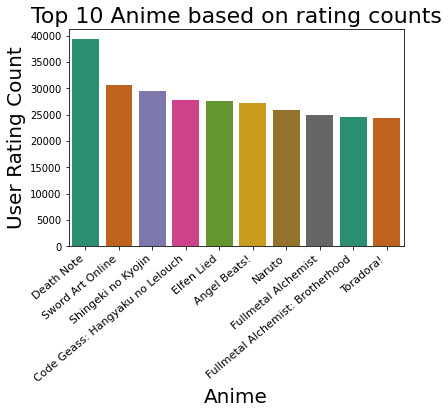

In [16]:
#Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis=0, subset=['anime_title'])
anime_ratingCount = (combine_anime_rating.
                     groupby(by = ['anime_title'])['user_rating'].
                     count().
                     reset_index().rename(columns = {'rating': 'totalRatingCount'})
                    [['anime_title', 'user_rating']]
                    )

#Plotting the bar plot for top 10 anime as per rating
top10_animerating = anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating', ascending = False).head(10)
ax = sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('User Rating Count', fontsize=20)

Text(0, 0.5, 'Community Size')

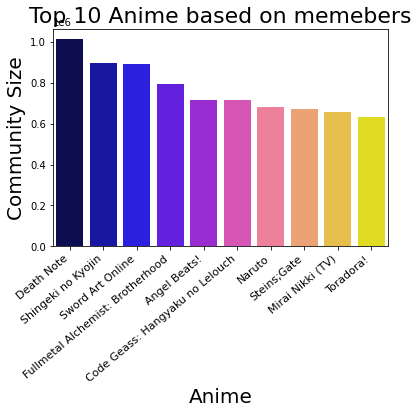

In [17]:
# Creating a copy and dropping the duplicates
duplicate_anime = anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset="anime_title",
                                keep = 'first', inplace=True)

#Plotting bar plot
top10_animemembers = duplicate_anime[['anime_title', 'members']].sort_values(by = 'members', ascending=False).head(10)
ax = sns.barplot(x='anime_title', y='members', data=top10_animemembers, palette='gnuplot2')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on memebers', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('Community Size', fontsize=20)

Text(0.5, 1.0, 'Rating of users')

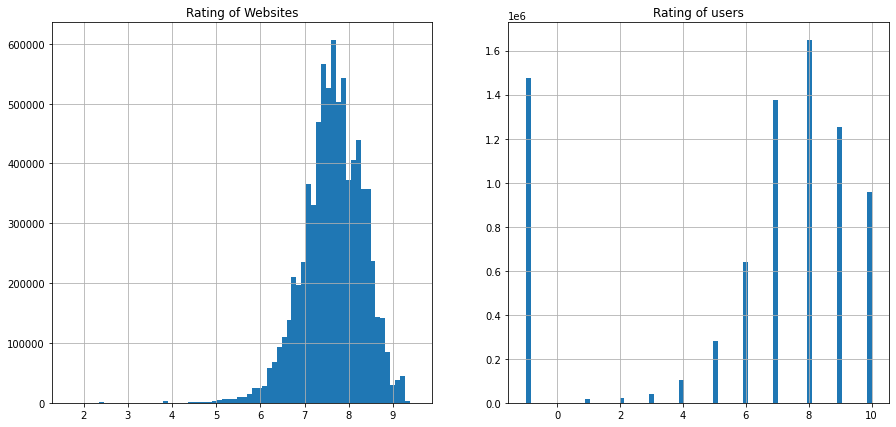

In [18]:
#Distribution of ratings
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of Websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title('Rating of users')

In [19]:
# Medium of Streaming
# Now we'll be seeing from where does this powerful anime's are coming from

import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

(-0.5, 799.5, 399.5, -0.5)

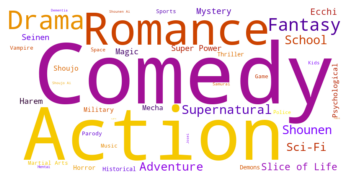

In [20]:
# Genre Word Cloud
nonull_anime = anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
  for genre in genres.split(','):
    all_genres[genre.strip()] +=1


from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

In [21]:
# Preparing data for consumption

# A) Handling NaN values
#Replacing -1 with NaN in user_rating column
anime_feature = anime_fulldata.copy()
anime_feature["user_rating"].replace({-1 : np.nan}, inplace=True)
anime_feature.head()
# dropping all the null values as it aids nothing
anime_feature = anime_feature.dropna(axis = 0, how = 'any')
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [22]:
# B) Filtering user_id
anime_feature['user_id'].value_counts()

counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [23]:
# C) Pivot Dojo
anime_pivot = anime_feature.pivot_table(index='anime_title', columns='user_id', values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Recommendation Building phase 
from scipy.sparse import csr_matrix
# Creating a sparse matrix
anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

# Fitting the model
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
query_index = np.random.choice(anime_pivot.shape[0])
#print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [26]:
# Testing collaborative recommendation
for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommedation for {0}:\n'.format(anime_pivot.index[query_index]))
  else:
    print('{0} : {1}, with distance of {2}: '.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
    

Recommedation for Shownoid Mako-chan:

1 : Orchid☆Emblem, with distance of 0.6945181452149061: 
2 : Henbou Moral Hazard, with distance of 0.7280252570288017: 
3 : Parade Parade, with distance of 0.7396640486219952: 
4 : Yayoi, with distance of 0.7435887029658146: 
5 : Septem Charm Magical Kanan, with distance of 0.7451566806848458: 


In [28]:
# Content Based Filtering
# A) Cleaning anime_title
import re
def text_cleaning(text):
  text = re.sub(r'&quot;', '',text)
  text = re.sub(r'.hack//', '',text)
  text = re.sub(r'&#039;', '',text)
  text = re.sub(r'A&#039;s', '',text)
  text = re.sub(r'I&#039;', '',text)
  text = re.sub(r'&amp;', '',text)
  return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [30]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# B) Term Frequency(TF) and Incerse Document Frequency(IDF)
# TF is simply the frequency of a word in a document. 
#IDF is the inverse of the document frequency among the whole corpus of documents. 
#TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. 
#It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. 

from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                     ngram_range=(1,3),
                     stop_words='english')


# Falling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)



from sklearn.metrics.pairwise import sigmoid_kernel

#Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [38]:
# C) Content Based Recommendation Function
def give_rec(title, sig=sig):
  # Get the index corresponding to original_title
  idx = indices[title] 
  
  # Get the pariwise similarity scores
  sig_scores = list(enumerate(sig[idx]))
  
  # Sort the movies 
  sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
  
  # Scores of the 10 most similar movies
  sig_scores = sig_scores[1:11]
  
  # Movie Indices
  anime_indices = [i[0] for i in sig_scores]

  # Top 10 most similar movies
  return pd.DataFrame({'Anime Name': anime_data['name'].iloc[anime_indices].values,
                       'Rating':anime_data['rating'].iloc[anime_indices].values})

In [43]:
give_rec('Naruto: Shippuuden')

,Anime Name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21
